# Programming languages and Databse trends
This notebook will explore trends in the job market, using a subset of publicly available StackOverflow survey dataset.
We will start first by exploring the programming language trends and then the trends for database. 
We will use SQL queries in combination with Pandas to easily extract data on interest.

In [26]:
#Import the relevant libraries 

import sqlite3
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

mpl.style.use('ggplot')  

# Load dataset
df = pd.read_csv("survey-data_cleaned.csv", keep_default_na= False)

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


56394

### Programming languages trend

In [27]:
# Identifying columns that have languages used
for i in df.columns:
    if "Language" in i:
        print(i)


LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired


We will start by plotting a bar chart with the Top 10 currently used programming languages by using the *LanguageHaveWorkedWith* column. Let's first explore the datacolumn using a SQL query.

In [28]:
QUERY = """
SELECT LanguageHaveWorkedWith, COUNT(*) as Count
FROM main
WHERE LanguageHaveWorkedWith != 'None'
GROUP BY LanguageHaveWorkedWith
ORDER BY Count DESC
LIMIT 10
"""

df_top10 = pd.read_sql_query(QUERY, conn)

#Plot data

df_top10

,LanguageHaveWorkedWith,Count
0,HTML/CSS;JavaScript;TypeScript,825
1,Python,715
2,HTML/CSS;JavaScript;PHP;SQL,429
3,HTML/CSS;JavaScript,390
4,C#,377
5,Python;SQL,373
6,C#;HTML/CSS;JavaScript;SQL;TypeScript,363
7,Java,341
8,JavaScript;TypeScript,336
9,C#;HTML/CSS;JavaScript;SQL,309


As the participants ticked different choices and these are separated by a semicolon, we will split by each of these ';' and create a new dataframe counting the values that each option appeared. We will now proceed by doing this.

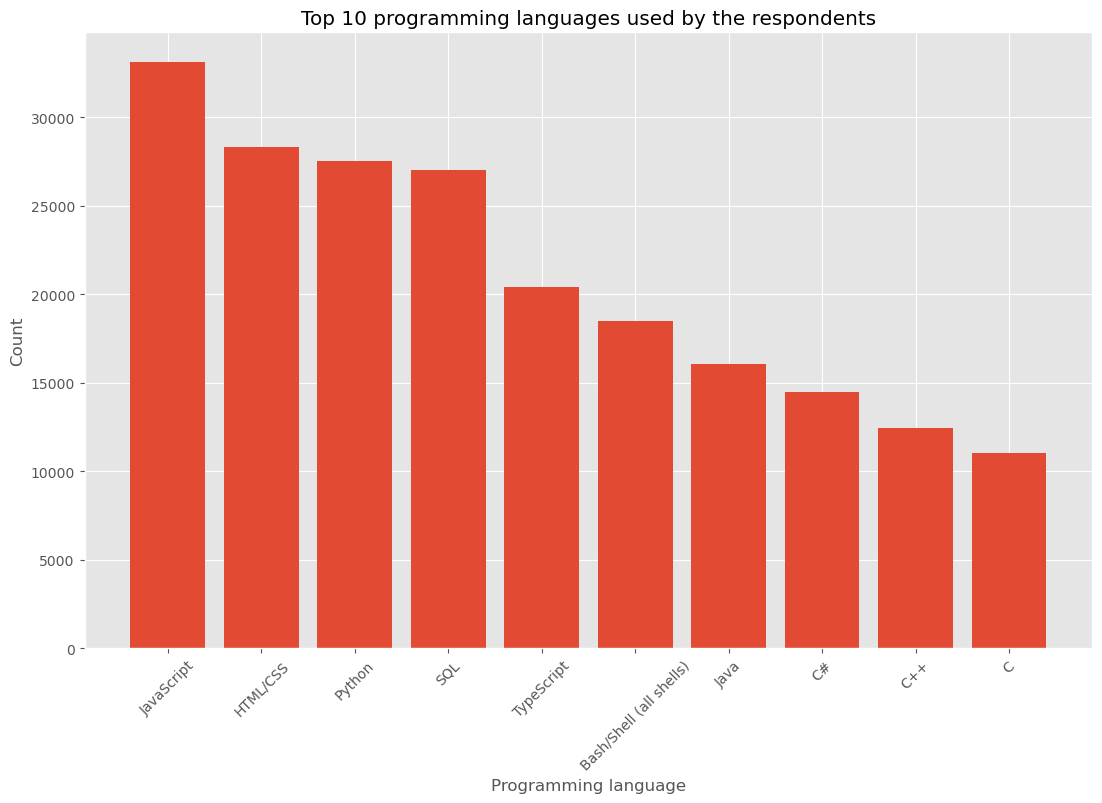

In [29]:
#Getting the top 10 programming languages used

worked_lang = df["LanguageHaveWorkedWith"].str.split(";")
worked_lang = pd.Series([item for sublist in worked_lang for item in sublist]).to_frame()
worked_counts = worked_lang.value_counts()[:10].reset_index()
worked_counts.rename(columns = {0:"LanguageHaveWorkedWith"}, inplace= True)

# Plot the results

fig = plt.figure(figsize=(13,8))
plt.bar(data = worked_counts, x = "LanguageHaveWorkedWith", height = "count")
plt.xticks(rotation = 45)
plt.title("Top 10 programming languages used by the respondents")
plt.xlabel("Programming language")
plt.ylabel("Count")
plt.show()

We repeat the same process for the *LanguageWantToWorkWith* column now, to estimate the programming language that will be most used in the follwing year.

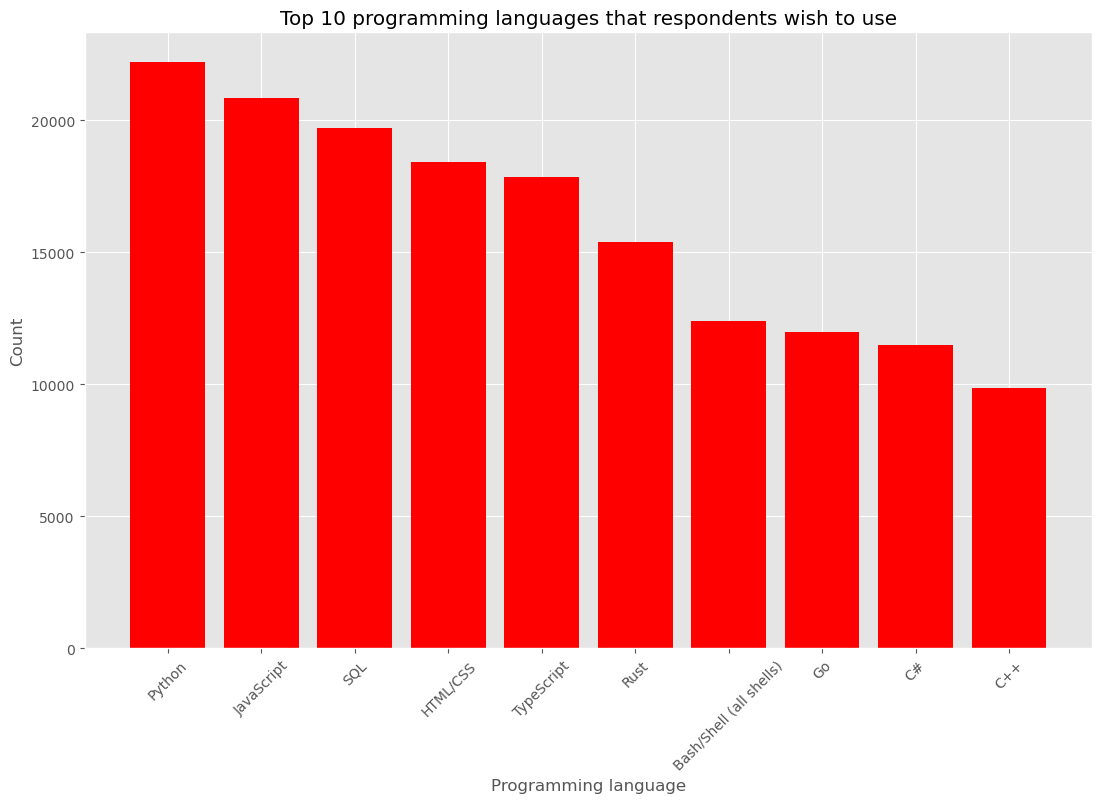

In [30]:
wants_lang = df["LanguageWantToWorkWith"].str.split(";")
wants_lang= pd.Series([item for sublist in wants_lang for item in sublist]).to_frame()
wants_counts = wants_lang.value_counts()[:10].reset_index()
wants_counts.rename(columns = {0:"LanguageWantToWorkedWith"}, inplace= True)

# Plot the results

fig = plt.figure(figsize=(13,8))
plt.bar(data = wants_counts, x = "LanguageWantToWorkedWith", height = "count", color = "red")
plt.xticks(rotation = 45)
plt.title("Top 10 programming languages that respondents wish to use")
plt.xlabel("Programming language")
plt.ylabel("Count")
plt.show()

We can plot now these two charts together, using a horizontal bar chart.

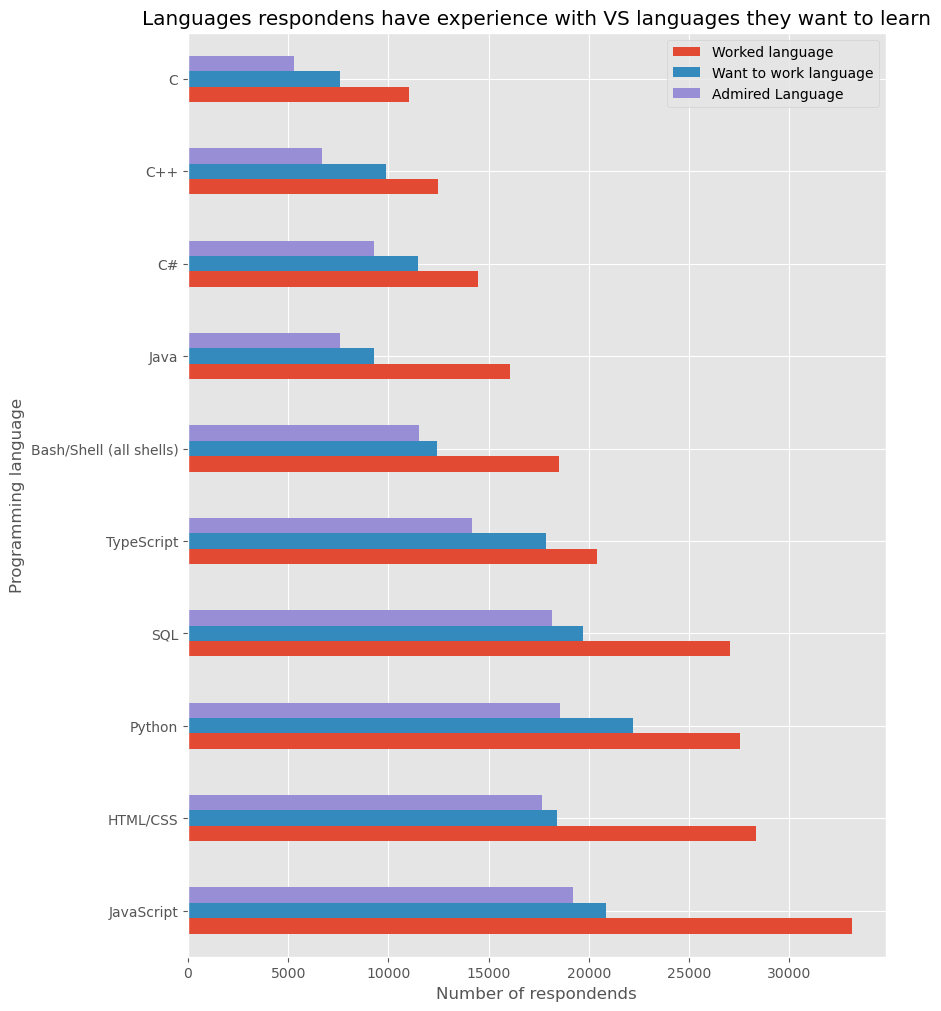

In [31]:
worked = df["LanguageHaveWorkedWith"].str.split(";")
want = df["LanguageWantToWorkWith"].str.split(";")
admired = df["LanguageAdmired"].str.split(";")
worked = pd.Series([item for sublist in worked for item in sublist])
want = pd.Series([item for sublist in want for item in sublist])
admired = pd.Series([item for sublist in admired for item in sublist])
worked_counts = worked.value_counts()
want_counts = want.value_counts()
admired_counts = admired.value_counts()
freq_df = pd.concat((worked_counts, want_counts, admired_counts), axis = 1)[:10]
freq_df.columns = ["Worked language", "Want to work language","Admired Language"]
freq_df.plot(kind = "barh", figsize = (9,12))
plt.title("Languages respondents have experience with VS languages they want to learn")
plt.xlabel("Number of respondents")
plt.ylabel("Programming language")
plt.show()

Looking at the above charts it seems that overall there are more people that have worked overall with more programming languages than the languages they want to work with. However, from these charts it seems that more respondents wish to work with Python than JavaScript, HTML/CSS or even SQL. This likely means that Python will be used more and more compared to JavaScript and HTML/CSS, while SQL remaining as the second most used language. Oveerall Python, TypeScript and Rust seemd to be in upward trend. Rust has the largest amount of respondents that wish to work with it compared to the amount of people that already work with it.

### Database trend

We can use SQL query to quickly extract the data about databsase trends

In [32]:
# Identifying columns that have languages used
for i in df.columns:
    if "Database" in i:
        print(i)

DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired


Like before, we explore the data using a simple SQL Query, choosing the column *DatabaseHaveWorkedWith* to estimate the currently most used databsases. We will get an idea of the data by plotting a pie chart.

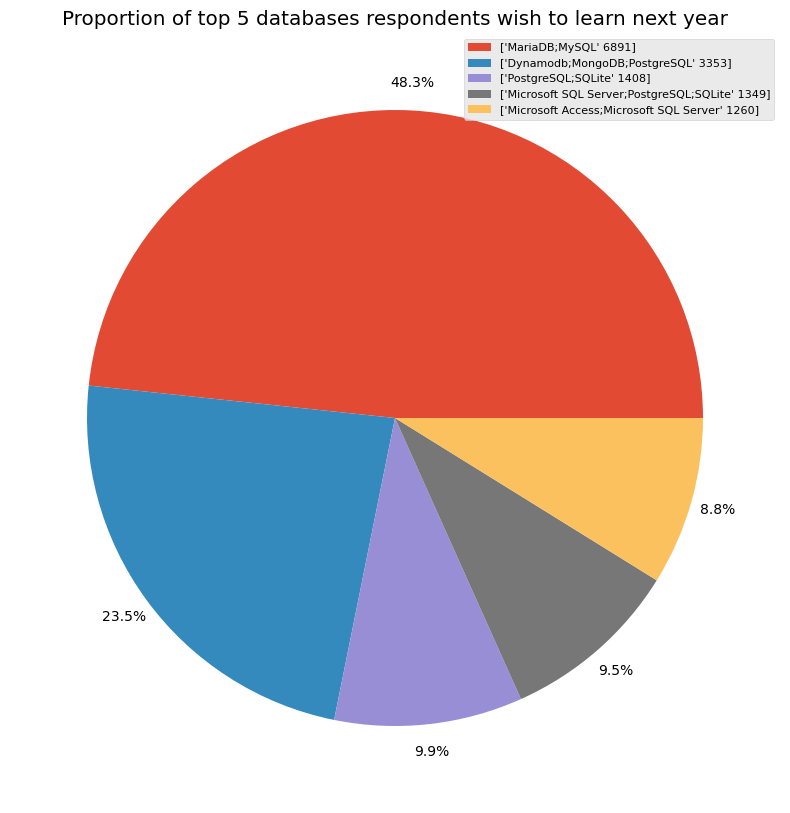

In [33]:
QUERY = """
SELECT DatabaseHaveWorkedWith, COUNT(*) as Count
FROM main
WHERE DatabaseHaveWorkedWith != 'None'
GROUP BY DatabaseWantToWorkWith
ORDER BY Count DESC
LIMIT 5
"""

data = pd.read_sql_query(QUERY, conn)

#Plot data

data.plot(kind = "pie", x = "DatabaseHaveWorkedWith", labels = None, y = "Count", autopct='%1.1f%%', pctdistance=1.09, figsize = (10,10) )
plt.legend(labels=data.values, loc='upper right',fontsize=8) 
plt.ylabel("")
plt.title("Proportion of top 5 databases respondents wish to learn next year")
plt.show()

Looking at the pie chart above, we can immediately see how the respondents selected multiple database choices. We need to proceed like we did before: splitting each data points into a list and collect the total value counts.

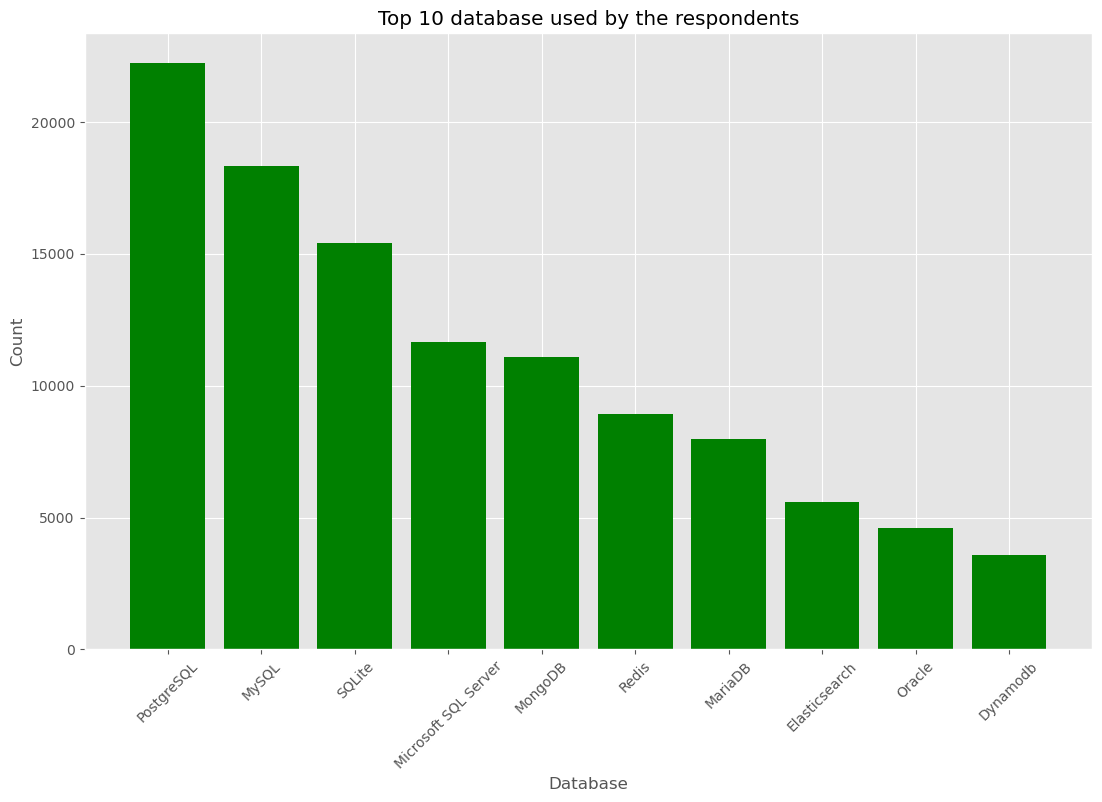

In [34]:
#Getting the top 10 database used

worked_datab = df[df["DatabaseHaveWorkedWith"] != "None"]
worked_datab = worked_datab["DatabaseHaveWorkedWith"].str.split(";")
worked_datab = pd.Series([item for sublist in worked_datab for item in sublist]).to_frame()
worked_dat_counts = worked_datab.value_counts()[:10].reset_index()
worked_dat_counts.rename(columns = {0:"DatabaseHaveWorkedWith"}, inplace= True)
worked_dat_counts

# Plot the results

fig = plt.figure(figsize=(13,8))
plt.bar(data = worked_dat_counts, x = "DatabaseHaveWorkedWith", height = "count", color = 'green')
plt.xticks(rotation = 45)
plt.title("Top 10 database used by the respondents")
plt.xlabel("Database")
plt.ylabel("Count")
plt.show()

We repeat the same process for the *DatabaseWantToWorkWith*  column now, to estimate the programming language that will be most used in the follwing year.

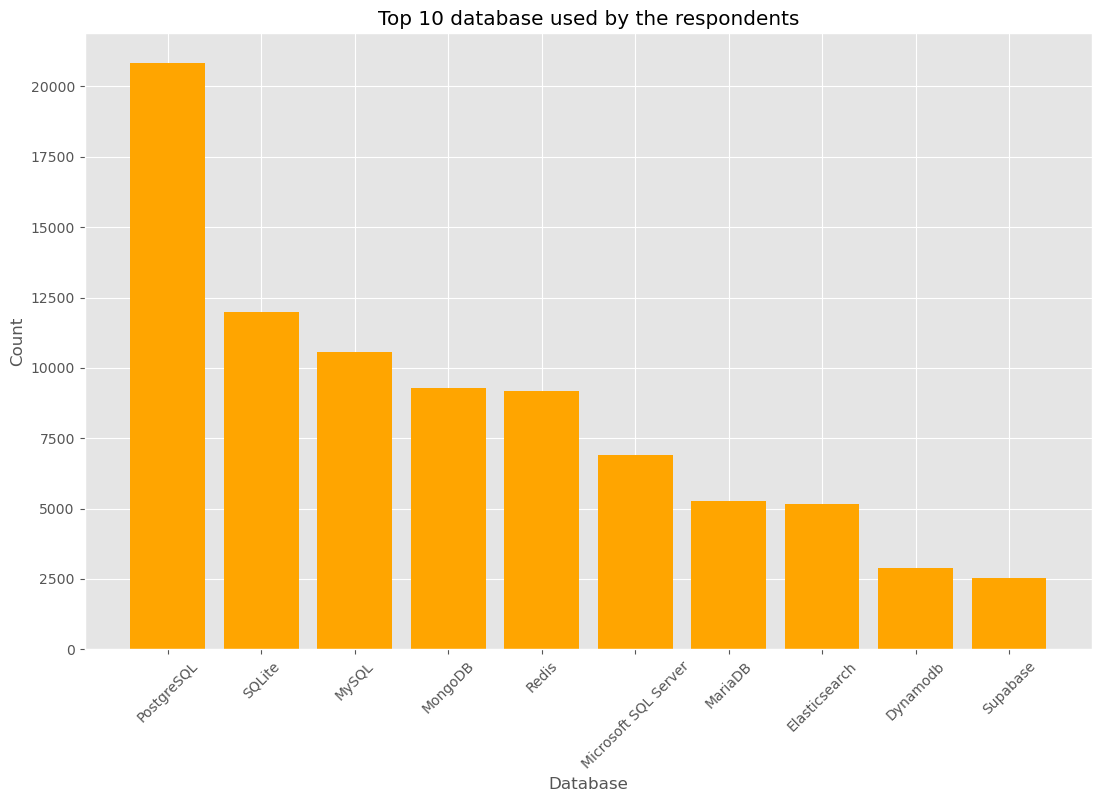

In [35]:
#Getting the top 10 database used

wanted_datab = df[df["DatabaseWantToWorkWith"] != "None"]
want_datab = wanted_datab["DatabaseWantToWorkWith"].str.split(";")
want_datab = pd.Series([item for sublist in want_datab for item in sublist]).to_frame()
want_dat_counts = want_datab.value_counts()[:10].reset_index()
want_dat_counts.rename(columns = {0:"DatabaseWantToWorkWith"}, inplace= True)


# Plot the results

fig = plt.figure(figsize=(13,8))
plt.bar(data = want_dat_counts, x = "DatabaseWantToWorkWith", height = "count", color = 'orange')
plt.xticks(rotation = 45)
plt.title("Top 10 database used by the respondents")
plt.xlabel("Database")
plt.ylabel("Count")
plt.show()

Finally we can plot the bars together to have even better insight of the trend.

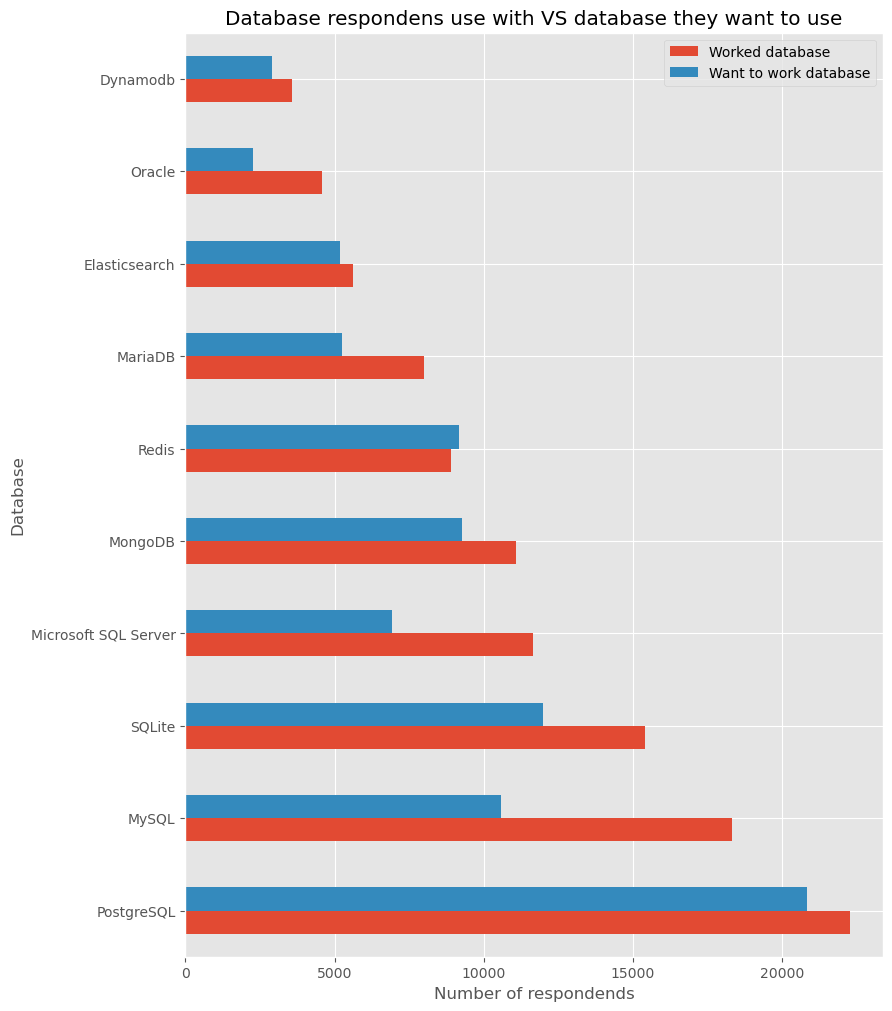

In [36]:
want = df[df["DatabaseWantToWorkWith"] != "None"]
worked = df[df["DatabaseHaveWorkedWith"] != "None"]
worked = worked["DatabaseHaveWorkedWith"].str.split(";")
want = want["DatabaseWantToWorkWith"].str.split(";")
worked = pd.Series([item for sublist in worked for item in sublist])
want = pd.Series([item for sublist in want for item in sublist])
worked_counts = worked.value_counts()
want_counts = want.value_counts()
freq_df = pd.concat((worked_counts, want_counts), axis = 1)[:10]
freq_df.columns = ["Worked database", "Want to work database"]
freq_df.plot(kind = "barh", figsize = (9,12))
plt.title("Database respondents use with VS database they want to use")
plt.xlabel("Number of respondents")
plt.ylabel("Database")
plt.show()

The first insight that can immmediately be noticed is that despite PostegreSQL is the database most used by respondents, an even larger number of respondents would like to work with it, which means it is likely increasing further in popularity in the upcoming years. We can see an opposite trend in MySQL. SQLite has a larger number of participants that wish to work with than MySQL. Also Redis seems to be on a growing trend. Overall PostegreSQL seems to become even more dominant than it currently is among respondens.

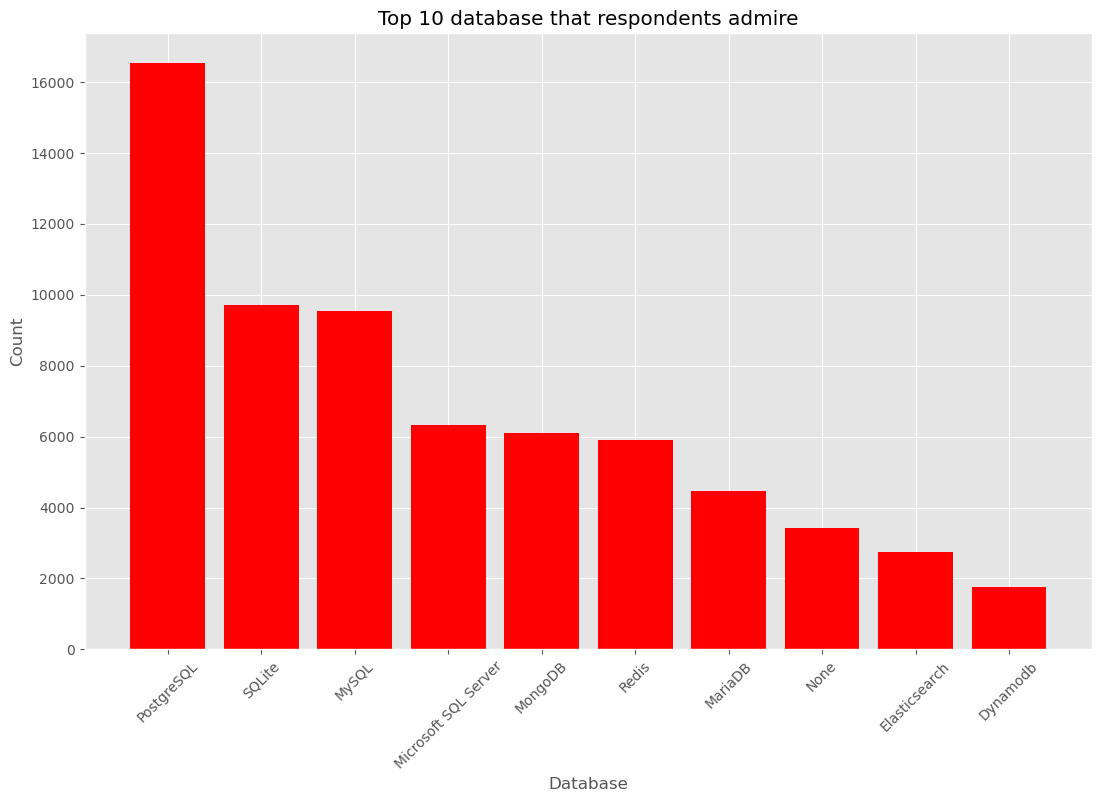

In [37]:
admired_datab = df[df["DatabaseWantToWorkWith"] != "None"]
admired_datab = admired_datab["DatabaseAdmired"].str.split(";")
admired_datab = pd.Series([item for sublist in admired_datab for item in sublist]).to_frame()
admired_dat_counts = admired_datab.value_counts()[:10].reset_index()
admired_dat_counts.rename(columns = {0:"DatabaseAdmired"}, inplace= True)


# Plot the results

fig = plt.figure(figsize=(13,8))
plt.bar(data = admired_dat_counts, x = "DatabaseAdmired", height = "count", color = 'red')
plt.xticks(rotation = 45)
plt.title("Top 10 database that respondents admire")
plt.xlabel("Database")
plt.ylabel("Count")
plt.show()

## Platform trend

We repeat a similar process previously seen for the web platforms

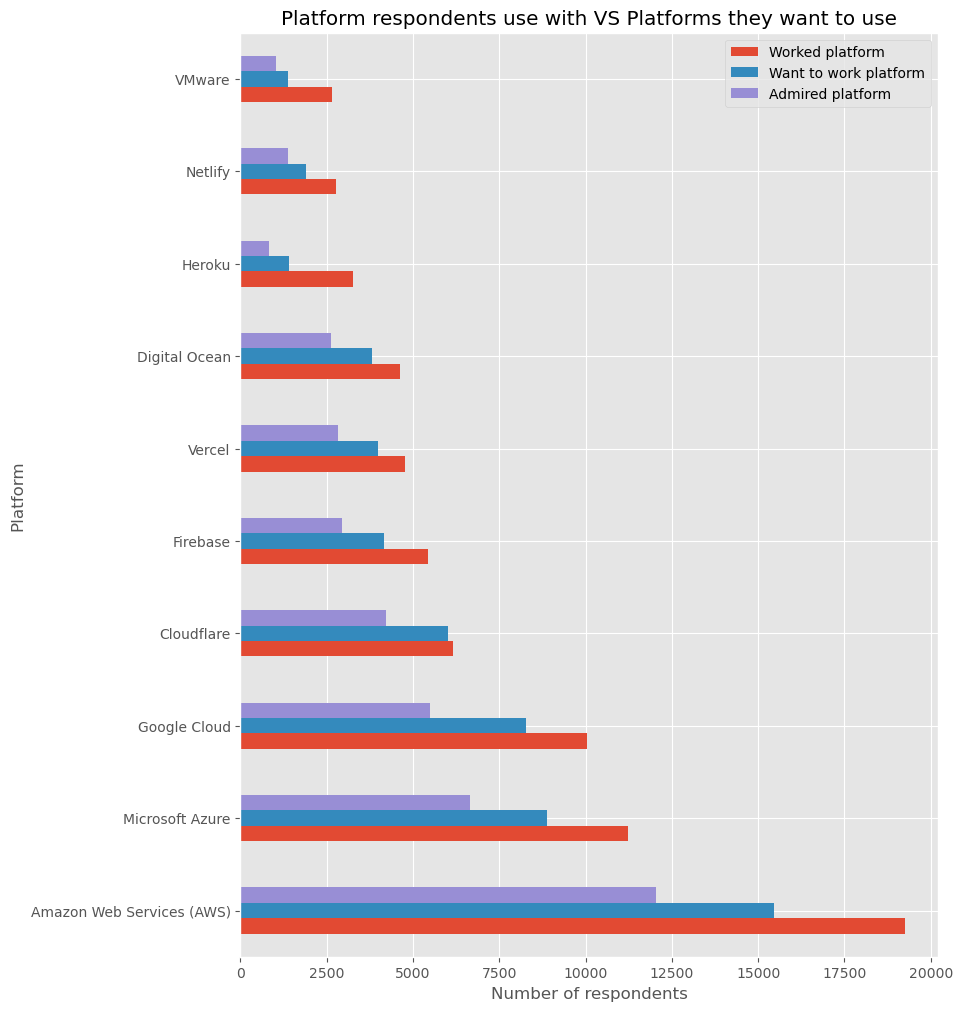

In [75]:
want = df[df["PlatformWantToWorkWith"] != "None"]
worked = df[df["PlatformHaveWorkedWith"] != "None"]
admired = df[df["PlatformAdmired"] != "None"]
worked = worked["PlatformHaveWorkedWith"].str.split(";")
want = want["PlatformWantToWorkWith"].str.split(";")
admired = df["PlatformAdmired"].str.split(";")
worked = pd.Series([item for sublist in worked for item in sublist])
want = pd.Series([item for sublist in want for item in sublist])
admired = pd.Series([item for sublist in admired for item in sublist])
worked_counts = worked.value_counts()
want_counts = want.value_counts()
admired_counts = admired.value_counts()
freq_df = pd.concat((worked_counts, want_counts, admired_counts), axis = 1)[:10]
freq_df.columns = ["Worked platform", "Want to work platform", "Admired platform"]
freq_df.plot(kind = "barh", figsize = (9,12))
plt.title("Platform respondents use with VS Platforms they want to use")
plt.xlabel("Number of respondents")
plt.ylabel("Platform")
plt.show()

## Web frames

Finally we finish the trend chart looking at web services

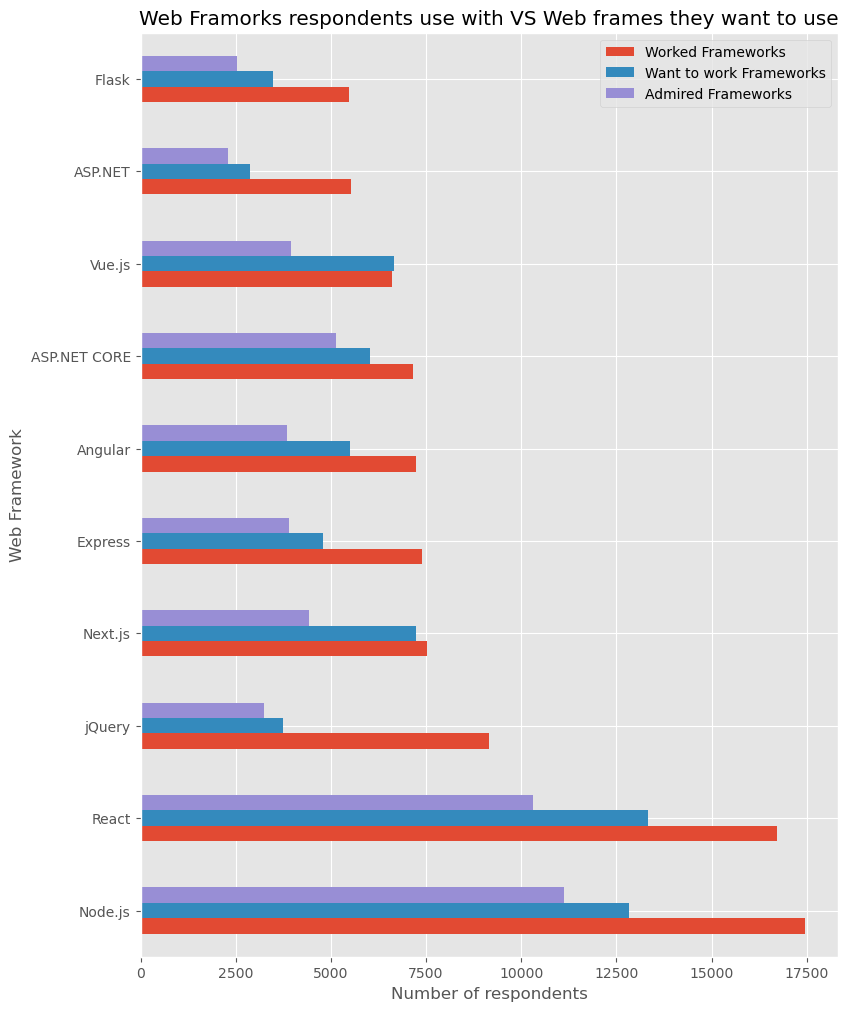

In [77]:
want = df[df["WebframeWantToWorkWith"] != "None"]
worked = df[df["WebframeHaveWorkedWith"] != "None"]
admired = df[df["WebframeAdmired"] != "None"]
worked = worked["WebframeHaveWorkedWith"].str.split(";")
want = want["WebframeWantToWorkWith"].str.split(";")
admired = df["WebframeAdmired"].str.split(";")
worked = pd.Series([item for sublist in worked for item in sublist])
want = pd.Series([item for sublist in want for item in sublist])
admired = pd.Series([item for sublist in admired for item in sublist])
worked_counts = worked.value_counts()
want_counts = want.value_counts()
admired_counts = admired.value_counts()
freq_df = pd.concat((worked_counts, want_counts, admired_counts), axis = 1)[:10]
freq_df.columns = ["Worked Frameworks", "Want to work Frameworks", "Admired Frameworks"]
freq_df.plot(kind = "barh", figsize = (9,12))
plt.title("Web Framorks respondents use with VS Web frames they want to use")
plt.xlabel("Number of respondents")
plt.ylabel("Web Framework")
plt.show()

# Conclusions


- PostegreSQL seems to assert dominance among databases.
- Web framework techs seems to have a low concentration in current and future usage, although the current and future short term most used ones are  Spring Boot and React.
- Microsoft Azure and AWS currently dominate and will probably keep dominating the platform tech.
- Programming languages usage instead seems to be more dynamic andcan change quickly •Web framework techs seems to have a low concentration in current and future usage, although the current and future short term most used ones are Spring Boot and React.

Some technologies rapidly increase in popularity, making the tech stack used by developers very dynamic and changing on a yearly basis. A few techs, especially PostegreSQL database, Microsoft Azure and AWS platforms seem to have a significant dominance in their respective market, that doesn't seem to be changing in the short term. A large amount of respondents are from either the US, UK or Germany, making the results possibly biased or skewed towards certain niche.

In [78]:
conn.close()